In [1]:
import os
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
class Affine:
    def __init__(self, w, b):
        self.w = w
        self.b = b
        self.dw = None
        self.db = None
        self.input = None
    
    def forward(self, x):
        self.input = x
        y = np.dot(self.w, x) + self.b
        return y
    
    def backward(self, dx):
        self.dw = np.dot(dx ,self.input.T)
        self.db = np.sum(dx, axis=1, keepdims=True)
        return np.dot(self.w.T, dx)
    
    def update(self, lr=0.1):
        self.w -= self.dw * lr
        self.b -= self.db * lr
    
class Sigmoid:
    def __init__(self):
        self.output = None
        
    def forward(self, x):
        y = 1 / (1 + np.exp(-x))
        self.output = y
        return y
    
    def backward(self, dx):
        return dx * self.output * (1.0 - self.output)
    
class MSE:
    def __init__(self):
        self.output = None
        self.t = None
    
    def forward(self, z, t):
        data_num = z.shape[-1]
        loss = np.sum((z - t) ** 2) / (2 * data_num)
        self.z = z
        self.t = t
        return loss
    
    def backward(self):
        return self.z - self.t
    
class SigmoidAndCrossEntropy:
    def __init__(self):
        self.y = None
        self.t = None
        
    def forward(self, x, t):
        y = 1 / (1 + np.exp(-x))
        data_num = y.shape[-1]
        loss = -1 * (t * np.log(y) + (1 - t) * np.log(1 - y)).mean()
        self.y = y
        self.t = t
        return loss
        
    def backward(self):
        return self.y - self.t

## Exercise4.1-1

In [21]:
x = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])
t = np.array([0, 1, 1, 0])

input_dim = 2
hidden_dim = 2
output_dim = 1

w = 2.0 * np.random.rand(hidden_dim, input_dim) - 1.0
b = 2.0 * np.random.rand(hidden_dim, 1) - 1.0
u = 2.0 * np.random.rand(output_dim, hidden_dim) -1.0
c = 2.0 * np.random.rand(output_dim, 1) - 1.0

layer1 = Affine(w, b)
layer2 = Sigmoid()
layer3 = Affine(u, c)
layer4 = SigmoidAndCrossEntropy()

epoch = 1000
for i in range(epoch):
    p = layer1.forward(x)
    y = layer2.forward(p)
    q = layer3.forward(y)
    loss = layer4.forward(q, t)
    
    dq = layer4.backward()
    dy = layer3.backward(dq)
    dp = layer2.backward(dy)
    dx = layer1.backward(dp)
    
    layer1.update()
    layer3.update()
    
    if i % 100 == 0:
        print('epoch', i, 'loss', loss, 'y', layer4.y)

epoch 0 loss 0.706575883796967 y [[0.587688   0.53509165 0.58682017 0.54249822]]
epoch 100 loss 0.6904405173924182 y [[0.50075134 0.52039929 0.47843631 0.49171858]]
epoch 200 loss 0.21629958627642565 y [[0.20741608 0.88634178 0.72301019 0.17118378]]
epoch 300 loss 0.0234047518994882 y [[0.02277354 0.97216757 0.97750472 0.01941201]]
epoch 400 loss 0.011920514314600485 y [[0.01151172 0.9850331  0.98898454 0.00989765]]
epoch 500 loss 0.007947573541286022 y [[0.0076516  0.98983841 0.99275481 0.00660224]]
epoch 600 loss 0.005946770652306348 y [[0.00571502 0.99232783 0.99461493 0.00494204]]
epoch 700 loss 0.004745125096296916 y [[0.00455449 0.99384518 0.99571994 0.00394472]]
epoch 800 loss 0.003944749204570458 y [[0.00378266 0.99486506 0.99645101 0.00328031]]
epoch 900 loss 0.0033739198761100543 y [[0.00323279 0.99559694 0.99697005 0.00280637]]


## Exercise4.1-2

In [22]:
x = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])
t = np.array([0, 1, 1, 0])

input_dim = 2
output_dim = 1

w = 2.0 * np.random.rand(output_dim, input_dim) - 1.0
b = 2.0 * np.random.rand(output_dim, 1) - 1.0


layer1 = Affine(w, b)
layer2 = SigmoidAndCrossEntropy()

epoch = 1000
for i in range(epoch):
    p = layer1.forward(x)
    loss = layer2.forward(p, t)
    
    dp = layer2.backward()
    dx = layer1.backward(dp)
    
    layer1.update()
    
    if i % 100 == 0:
        print('epoch', i, 'loss', loss, 'y', layer2.y)

epoch 0 loss 0.7424335089477943 y [[0.30996943 0.28534938 0.45070116 0.42173493]]
epoch 100 loss 0.6931471805599454 y [[0.5 0.5 0.5 0.5]]
epoch 200 loss 0.6931471805599452 y [[0.5 0.5 0.5 0.5]]
epoch 300 loss 0.6931471805599453 y [[0.5 0.5 0.5 0.5]]
epoch 400 loss 0.6931471805599453 y [[0.5 0.5 0.5 0.5]]
epoch 500 loss 0.6931471805599453 y [[0.5 0.5 0.5 0.5]]
epoch 600 loss 0.6931471805599453 y [[0.5 0.5 0.5 0.5]]
epoch 700 loss 0.6931471805599453 y [[0.5 0.5 0.5 0.5]]
epoch 800 loss 0.6931471805599453 y [[0.5 0.5 0.5 0.5]]
epoch 900 loss 0.6931471805599453 y [[0.5 0.5 0.5 0.5]]


## Exercise4.1-3

In [23]:
x = np.array([[0, 0, 0, 0, 1, 1, 1, 1],
              [0, 0, 1, 1, 0, 0, 1, 1],
              [0, 1, 0, 1, 0, 1, 0, 1]])
t = np.array([0, 1, 1, 0, 1, 0, 0, 1])

input_dim = 3
hidden_dim = 3
output_dim = 1

w = 2.0 * np.random.rand(hidden_dim, input_dim) - 1.0
b = 2.0 * np.random.rand(hidden_dim, 1) - 1.0
u = 2.0 * np.random.rand(output_dim, hidden_dim) -1.0
c = 2.0 * np.random.rand(output_dim, 1) - 1.0

layer1 = Affine(w, b)
layer2 = Sigmoid()
layer3 = Affine(u, c)
layer4 = SigmoidAndCrossEntropy()

epoch = 1000
for i in range(epoch):
    p = layer1.forward(x)
    y = layer2.forward(p)
    q = layer3.forward(y)
    loss = layer4.forward(q, t)
    
    dq = layer4.backward()
    dy = layer3.backward(dq)
    dp = layer2.backward(dy)
    dx = layer1.backward(dp)
    
    layer1.update()
    layer3.update()
    
    if i % 100 == 0:
        print('epoch', i, 'loss', loss, 'y', layer4.y)

epoch 0 loss 0.7569672267475516 y [[0.68545861 0.6991134  0.6918391  0.70733958 0.63240986 0.64532427
  0.64019012 0.65242227]]
epoch 100 loss 0.7073718682628555 y [[0.53652657 0.59627517 0.60144254 0.61633766 0.59582246 0.6147338
  0.61597021 0.62012729]]
epoch 200 loss 0.6724121053595216 y [[0.27892378 0.9027918  0.93097588 0.78106731 0.90232495 0.74981821
  0.7807005  0.70198355]]
epoch 300 loss 0.2946331684145387 y [[0.0154804  0.98377857 0.98341429 0.26103761 0.98371482 0.26104629
  0.26099229 0.25045144]]
epoch 400 loss 0.15213501825753073 y [[0.01807941 0.98631608 0.98653915 0.18770692 0.9864161  0.19438622
  0.18458219 0.58876505]]
epoch 500 loss 0.018658455420743073 y [[0.00813286 0.99146177 0.99143895 0.01927338 0.99147439 0.01926457
  0.01927361 0.94460283]]
epoch 600 loss 0.009111424717798097 y [[0.00623282 0.99464088 0.99461915 0.00893111 0.99464553 0.00892677
  0.0089311  0.9766841 ]]
epoch 700 loss 0.006058859138923263 y [[0.00494459 0.99609562 0.99607875 0.00573614 0.99

## Exercise4.1-4

In [26]:
x = np.array([[0, 0, 0, 0, 1, 1, 1, 1],
              [0, 0, 1, 1, 0, 0, 1, 1],
              [0, 1, 0, 1, 0, 1, 0, 1]])
t = np.array([0, 1, 1, 0, 1, 0, 0, 1])

input_dim = 3
hidden_dim = 2
output_dim = 1

w = 2.0 * np.random.rand(hidden_dim, input_dim) - 1.0
b = 2.0 * np.random.rand(hidden_dim, 1) - 1.0
u = 2.0 * np.random.rand(output_dim, hidden_dim) -1.0
c = 2.0 * np.random.rand(output_dim, 1) - 1.0

layer1 = Affine(w, b)
layer2 = Sigmoid()
layer3 = Affine(u, c)
layer4 = SigmoidAndCrossEntropy()

epoch = 1000
for i in range(epoch):
    p = layer1.forward(x)
    y = layer2.forward(p)
    q = layer3.forward(y)
    loss = layer4.forward(q, t)
    
    dq = layer4.backward()
    dy = layer3.backward(dq)
    dp = layer2.backward(dy)
    dx = layer1.backward(dp)
    
    layer1.update()
    layer3.update()
    
    if i % 100 == 0:
        print('epoch', i, 'loss', loss, 'y', layer4.y)

epoch 0 loss 0.9147069950881772 y [[0.18132317 0.20212241 0.19277975 0.2141089  0.18903368 0.21034223
  0.20094485 0.22196107]]
epoch 100 loss 0.6799459912079164 y [[0.2238357  0.41961782 0.42089837 0.44748853 0.4176084  0.44611058
  0.44698556 0.4480957 ]]
epoch 200 loss 0.31889976174503487 y [[0.04768285 0.95429884 0.95419229 0.27965573 0.95431132 0.279603
  0.27965005 0.25210487]]
epoch 300 loss 0.29268989371340814 y [[0.01671347 0.98719876 0.98717467 0.25770721 0.98720166 0.2576925
  0.25770563 0.24858294]]
epoch 400 loss 0.2878071102047187 y [[0.00976738 0.99276831 0.99275731 0.25432396 0.99276964 0.25431711
  0.25432322 0.2489568 ]]
epoch 500 loss 0.2857938320621163 y [[0.00684852 0.99501346 0.99500686 0.25297237 0.99501426 0.25296831
  0.25297193 0.24919429]]
epoch 600 loss 0.28470357514924327 y [[0.00525623 0.99621417 0.99620964 0.25225178 0.99621472 0.25224905
  0.25225148 0.24934629]]
epoch 700 loss 0.2840225558607353 y [[0.00425744 0.99695782 0.99695446 0.25180624 0.99695823

## Exercise4.1-5

In [28]:
x = np.array([[0, 0, 0, 0, 1, 1, 1, 1],
              [0, 0, 1, 1, 0, 0, 1, 1],
              [0, 1, 0, 1, 0, 1, 0, 1]])
t = np.array([0, 1, 1, 0, 1, 0, 0, 1])

input_dim = 3
output_dim = 1

w = 2.0 * np.random.rand(hidden_dim, input_dim) - 1.0
b = 2.0 * np.random.rand(hidden_dim, 1) - 1.0

layer1 = Affine(w, b)
layer2 = SigmoidAndCrossEntropy()

epoch = 1000
for i in range(epoch):
    p = layer1.forward(x)
    loss = layer2.forward(p, t)
    
    dp = layer2.backward()
    dx = layer1.backward(dp)
    
    layer1.update()
    
    if i % 100 == 0:
        print('epoch', i, 'loss', loss, 'y', layer2.y)

epoch 0 loss 0.7553541323511623 y [[0.50464905 0.65204633 0.61957603 0.74973485 0.39398684 0.54459751
  0.50964084 0.65656362]
 [0.45240716 0.57220675 0.27511962 0.3806027  0.30495321 0.41532105
  0.16774805 0.24603684]]
epoch 100 loss 1.6560977441839155 y [[0.85757581 0.93908255 0.939082   0.97528834 0.93907841 0.97528683
  0.9752866  0.99019947]
 [0.1424422  0.06092417 0.06091703 0.02471053 0.06091784 0.02471087
  0.02470786 0.00979801]]
epoch 200 loss 1.6560541576131014 y [[0.85759341 0.93908164 0.93908164 0.97528433 0.93908164 0.97528433
  0.97528433 0.990197  ]
 [0.14240664 0.06091836 0.06091836 0.02471566 0.06091836 0.02471566
  0.02471566 0.00980299]]
epoch 300 loss 1.6560540436134215 y [[0.85759345 0.93908164 0.93908164 0.97528433 0.93908164 0.97528433
  0.97528433 0.990197  ]
 [0.14240655 0.06091836 0.06091836 0.02471567 0.06091836 0.02471567
  0.02471567 0.009803  ]]
epoch 400 loss 1.65605404331527 y [[0.85759345 0.93908164 0.93908164 0.97528433 0.93908164 0.97528433
  0.9752

## Exercise4.2

### MNISTデータダウンロード

In [107]:
data_dir = os.path.join(os.path.abspath('..'), 'data')
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

X, Y = fetch_openml('mnist_784', data_home=data_dir, return_X_y=True)

### 学習設定・データローダー実装

In [3]:
class Dataset:
    def __init__(self, data_dir=None, data=None, transform=None, train=True):
        self.data_dir = data_dir
        self.transform = transform
        self.train = train
    
    def __getitem__(self, idx):
        raise NotImplementedError


class MNISTDataset(Dataset):
    
    urls = [
        'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz',
    ]
    
    def __init__(self, data_dir, transform=None, train=True):
        super(MNISTDataset, self).__init__(data_dir,
                                           transform=transform,
                                           train=train)
        
        if not self._exist_data():
            print('Start downloading MNIST data from http://yann.lecun.com/exdb/mnist/')
            self.download()
            print('Complete!')
        
        if self.train:
            self.data = (
                read_mnist_data(os.path.join(self.data_dir, 'train-images-idx3-ubyte.gz')),
                read_mnist_data(os.path.join(self.data_dir, 'train-labels-idx1-ubyte.gz')),
            )
        else:
            self.data = (
                read_mnist_data(os.path.join(self.data_dir, 't10k-images-idx3-ubyte.gz')),
                read_mnist_data(os.path.join(self.data_dir, 't10k-labels-idx1-ubyte.gz')),
            )
            
    def __getitem__(self, idx):
        images = self.data[0][idx]
        labels = self.data[1][idx]
        
        if self.transform:
            images, labels = self.transform((images, labels))
        
        return images, labels
    
    def __len__(self):
        return self.data[0].shape[0]
    
    def download(self):
        import urllib.request
        
        os.makedirs(self.data_dir, exist_ok=True)
        
        for url in self.urls:
            filename = url.rpartition('/')[2]
            urllib.request.urlretrieve(url, os.path.join(self.data_dir, filename))
        
        return
    
    def _exist_data(self):
        for url in self.urls:
            filename = url.rpartition('/')[2]
            if not os.path.isfile(os.path.join(self.data_dir, filename)):
                return False
        
        return True


class DataLoader:
    def __init__(self, dataset, batch_size=100):
        self.dataset = dataset
        self._batch_size = batch_size
        self._i = 0
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if (self._i * self._batch_size) >= len(self.dataset):
            self._i = 0
            raise StopIteration
        elif ((self._i + 1) * self._batch_size) >= len(self.dataset):
            x, y = self.dataset[self._i * self._batch_size:]
        else:
            x, y = self.dataset[self._i * self._batch_size:(self._i + 1) * self._batch_size]
        
        self._i += 1
        return x, y


def read_mnist_data(filepath):
    import gzip, codecs
    with gzip.open(filepath, 'rb') as f:
        data = f.read()
    
    magic = int(codecs.encode(data[0:4], 'hex'), 16)
    nd = magic % 256
    ty = magic // 256
    data_num = int(codecs.encode(data[4:8], 'hex'), 16)
    
    return np.frombuffer(data, dtype=np.uint8, offset=(4 * (nd + 1))).reshape(data_num, -1)


class MNISTTransform:
    def __init__(self):
        pass
    
    def __call__(self, data):
        x = data[0] / 255
        y = np.identity(10)[data[1].flatten()]
        
        return (x, y)


In [4]:
epochs = 5
batch_size = 100

input_dim = 784
hidden_dim = 10
output_dim = 10

mnist_train = MNISTDataset('../data/mnist', transform=MNISTTransform(), train=True)
dataloader_train = DataLoader(mnist_train, batch_size=batch_size)

Start downloading MNIST data from http://yann.lecun.com/exdb/mnist/
Complete!


### モデル学習

In [5]:
w = 2.0 * np.random.rand(hidden_dim, input_dim) - 1.0
b = 2.0 * np.random.rand(hidden_dim, 1) - 1.0
u = 2.0 * np.random.rand(output_dim, hidden_dim) -1.0
c = 2.0 * np.random.rand(output_dim, 1) - 1.0

layer1 = Affine(w, b)
layer2 = Sigmoid()
layer3 = Affine(u, c)
layer4 = Sigmoid()
layer5 = MSE()

loss = []

for epoch in range(epochs):
    predicts = []
    for x, y in dataloader_train:
        p = layer1.forward(x.T)
        t = layer2.forward(p)
        q = layer3.forward(t)
        z = layer4.forward(q)
        predicts.append(list(z.T))
        loss.append(layer5.forward(z, y.T))
        
        dz = layer5.backward()
        dq = layer4.backward(dz)
        dt = layer3.backward(dq)
        dp = layer2.backward(dt)
        dx = layer1.backward(dp)
        
        layer1.update(lr=0.01)
        layer3.update(lr=0.01)
    print('epoch:{epoch} loss:{loss}'.format(epoch=epoch, loss=loss[-1]))

images, labels = mnist_train[0:]
predicts = np.identity(10)[np.argmax(np.array(predicts).reshape(-1, 10), axis=1)]
results = np.dot(labels.T, predicts).astype(np.int32)

print(results)
print('accuary={}'.format(np.diag(results).sum() / results.sum()))

epoch:0 loss:0.3379676518566211
epoch:1 loss:0.23594588128504435
epoch:2 loss:0.1722073375253008
epoch:3 loss:0.13766380775297515
epoch:4 loss:0.1176365801136934
[[5523    2   83   18   19  120   73   29   53    3]
 [   4 6489   45   37   12   27   12   18   83   15]
 [ 107   85 4932  140  144   24  196  116  183   31]
 [ 101   79  157 5163   15  307   33   71  139   66]
 [   6   45   69    7 5250   11  121   17   25  291]
 [ 208   61   54  305   75 4121  151   49  319   78]
 [  84   40   86    6   49  151 5418    8   72    4]
 [  29   90   74   80  123   21   10 5516   28  294]
 [  21  166  124  243   83  376   59   34 4620  125]
 [  28   39   36   69  281   53    8  214   93 5128]]
accuary=0.8693333333333333


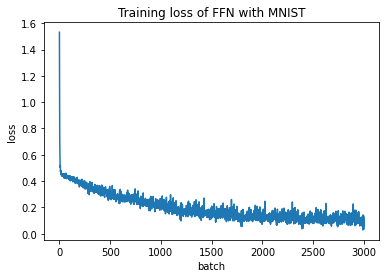

In [6]:
plt.plot(np.arange(3000), np.array(loss))
plt.title('Training loss of FFN with MNIST')
plt.xlabel('batch')
plt.ylabel('loss')
plt.show()

### モデル推論

In [7]:
mnist_test = MNISTDataset('../data/mnist', transform=MNISTTransform(), train=False)
dataloader_test = DataLoader(mnist_test, batch_size=batch_size)

In [8]:
predicts = []

for x, y in dataloader_test:
    p = layer1.forward(x.T)
    y = layer2.forward(p)
    q = layer3.forward(y)
    z = layer4.forward(q)
    predicts.append(list(z.T))
    
images, labels = mnist_test[0:]
predicts = np.identity(10)[np.argmax(np.array(predicts).reshape(-1, 10), axis=1)]
results = np.dot(labels.T, predicts).astype(np.int32)

print(results)
print('accuary={}'.format(np.diag(results).sum() / results.sum()))

[[ 940    0    2    3    1   13    9    5    6    1]
 [   0 1102    5    4    1    2    5    1   14    1]
 [  17   12  859   20   22    2   27   24   38   11]
 [  13   14   32  848    4   49    2   11   27   10]
 [   2    3    4    1  885    1   29    0    2   55]
 [  26    8    5   58   12  681   18   16   54   14]
 [  17    7    6    2    9   29  874    5    6    3]
 [  10   21   26   11   15    1    1  888    0   55]
 [   5   19   14   30   17   58   10   11  783   27]
 [   2    6    3    9   38   13    4   17   10  907]]
accuary=0.8767


## Exercise4.3

### 学習設定

In [11]:
epochs = 20  # 5 -> 20へ変更
batch_size = 100

input_dim = 784
hidden_dim = 50 # 10 -> 50へ変更
output_dim = 10

### MNISTデータロード

In [12]:
mnist_train = MNISTDataset('../data/mnist', transform=MNISTTransform(), train=True)
mnist_test = MNISTDataset('../data/mnist', transform=MNISTTransform(), train=False)
dataloader_train = DataLoader(mnist_train, batch_size=batch_size)
dataloader_test = DataLoader(mnist_test, batch_size=batch_size)

### モデル訓練

In [13]:
w = np.random.randn(hidden_dim, input_dim)
b = np.random.randn(hidden_dim, 1)
u = np.random.randn(output_dim, hidden_dim)
c = np.random.randn(output_dim, 1)

layer1 = Affine(w, b)
layer2 = Sigmoid()
layer3 = Affine(u, c)
layer4 = Sigmoid()
layer5 = MSE()

loss = []

for epoch in range(epochs):
    predicts = []
    for x, y in dataloader_train:
        p = layer1.forward(x.T)
        t = layer2.forward(p)
        q = layer3.forward(t)
        z = layer4.forward(q)
        predicts.append(list(z.T))
        loss.append(layer5.forward(z, y.T))
        
        dz = layer5.backward()
        dq = layer4.backward(dz)
        dt = layer3.backward(dq)
        dp = layer2.backward(dt)
        dx = layer1.backward(dp)
        
        layer1.update(lr=0.05)
        layer3.update(lr=0.05)
    print('epoch:{epoch} loss:{loss}'.format(epoch=epoch, loss=loss[-1]))

images, labels = mnist_train[0:]
predicts = np.identity(10)[np.argmax(np.array(predicts).reshape(-1, 10), axis=1)]
results = np.dot(labels.T, predicts).astype(np.int32)

print(results)
print('accuary={}'.format(np.diag(results).sum() / results.sum()))

epoch:0 loss:0.1633836073609988
epoch:1 loss:0.12140307358812319
epoch:2 loss:0.09244156424985465
epoch:3 loss:0.07356927472199751
epoch:4 loss:0.060659091298406194
epoch:5 loss:0.050045470473923735
epoch:6 loss:0.04497561677950311
epoch:7 loss:0.04207789214809992
epoch:8 loss:0.04009174121413638
epoch:9 loss:0.03839578541351147
epoch:10 loss:0.036900219696846766
epoch:11 loss:0.035564771077451034
epoch:12 loss:0.0344201861932692
epoch:13 loss:0.033316680043129064
epoch:14 loss:0.03223639157606846
epoch:15 loss:0.031272697857224474
epoch:16 loss:0.030552150311405936
epoch:17 loss:0.030019245001676405
epoch:18 loss:0.02955601826692483
epoch:19 loss:0.0291414634769169
[[5802    0    9   10    6   11   33    7   34   11]
 [   0 6607   35   20    8    7    7   12   31   15]
 [  21   14 5685   38   32   13   25   59   64    7]
 [  15    7   86 5748    5   88   14   61   78   29]
 [  14   12   24    3 5615    6   33    9   17  109]
 [  35   11   26   79   19 5089   68   13   54   27]
 [  32 

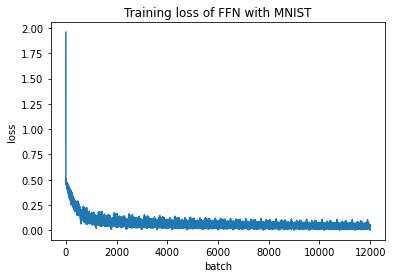

In [14]:
plt.plot(np.arange(12000), np.array(loss))
plt.title('Training loss of FFN with MNIST')
plt.xlabel('batch')
plt.ylabel('loss')
plt.show()

### モデル推論

In [15]:
predicts = []

for x, y in dataloader_test:
    p = layer1.forward(x.T)
    y = layer2.forward(p)
    q = layer3.forward(y)
    z = layer4.forward(q)
    predicts.append(list(z.T))
    
images, labels = mnist_test[0:]
predicts = np.identity(10)[np.argmax(np.array(predicts).reshape(-1, 10), axis=1)]
results = np.dot(labels.T, predicts).astype(np.int32)

print(results)
print('accuary={}'.format(np.diag(results).sum() / results.sum()))

[[ 958    0    1    2    1    6    7    1    4    0]
 [   0 1114    3    3    1    2    4    2    6    0]
 [  13    2  969   10    6    1    7   11   12    1]
 [   5    2   14  931    1   21    2    9   21    4]
 [   4    1    4    1  920    1   10    3    2   36]
 [   5    1    6   13    6  830   17    4    5    5]
 [   9    3    2    1    6   17  917    0    2    1]
 [   1    6   17    5    5    1    0  973    2   18]
 [   3    5   11   16    5   10    5    7  907    5]
 [   5    4    2    7   17    7    1    7    9  950]]
accuary=0.9469
